# 前処理

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#scvファイルの読み込み
livestock = pd.read_csv("../data/livestock.csv")
cultured = pd.read_csv("../data/cultured.csv")

In [3]:
data_pre = pd.concat([livestock,cultured],sort=False)
data = data_pre.reset_index(drop=True)

In [6]:
data[:109]

,プロジェクト名,URL,支援総額,目標金額,支援者数,画像数,動画数,文字数,活動報告回数,リターン種類数,最高支援額,支援額上限,支援額下限,最低支援額,返礼品ありの下限,CFP,産業
0,国分牧場とお客様をつなぐ！直売×カフェ×農業体験の複合施設を,https://readyfor.jp/projects/kokubufarm,1185000,1000000,71,8,0,2566,3,9,50000,50000,5000,5000,5000,Readyfor,畜産
1,宮古島のアロエ畑とヤギ。しろう農園ふれあい牧場リニューアル！,https://readyfor.jp/projects/shirounouen,1382000,1000000,72,22,0,4010,5,12,100000,100000,3000,3000,3000,Readyfor,畜産
2,村人の命を守り、限界集落の未来を救うため、牧場を作りたい,https://readyfor.jp/projects/nigiwaibokujo,1205000,1000000,91,9,1,4244,27,12,100000,100000,5000,5000,5000,Readyfor,畜産
3,ストレスのない牛の生活環境を作りたい,https://readyfor.jp/projects/tusimaakausinosia...,865000,600000,79,10,0,3500,13,5,10000,15000,5000,5000,10000,Readyfor,畜産
4,機材を改修し、震災で販売休止となった森林ノ牛乳を復活させたい,https://readyfor.jp/projects/shinrinno,1619000,1000000,116,18,0,3457,17,6,100000,300000,3000,3000,10000,Readyfor,畜産
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
104,希少和牛の希少部位！奥出雲和牛のシャトーブリアンとすき焼きセットをお届けします,https://www.makuake.com/project/okuizumowagyu/,2619000,500000,166,28,1,2658,11,4,38000,38000,3480,3480,3480,Makuake,畜産
105,信州生産者応援プロジェクト,https://www.makuake.com/project/nagano/,613000,300000,80,6,0,4414,7,4,10000,10000,5000,5000,5000,Makuake,畜産
106,日本中の仲良し夫婦に食べてほしい！愛妻家の聖地から生まれた大人のプリン,https://www.makuake.com/project/tbeegarden/,312200,100000,81,22,0,1659,2,6,5600,5600,3000,3000,3000,Makuake,畜産
107,子供の誕生と成長を願う町からヤギミルクが次世代に絆ぐ新メェ～産品,https://www.makuake.com/project/koyasufarm02/,361800,300000,53,8,0,1773,13,10,100000,100000,3800,3800,3800,Makuake,畜産


In [4]:
# 新しい説明変数を作成する

#一人当たり支援額
data["一人当たり支援額"] = round(data["支援総額"]/(data["支援者数"]+1))
#最高額支援ダミー:最高支援額と支援額上限が一致するか 0:不一致 1:一致
data["最高額支援ダミー"] = 0
data.loc[data['最高支援額']==data['支援額上限'],'最高額支援ダミー'] = 1
#最低額返礼品ダミー:支援額下限と返礼品ありの下限が一致するか　0:不一致　1:一致
data["最低額返礼品ダミー"] = 0
data.loc[data['支援額下限']==data['返礼品ありの下限'],'最低額返礼品ダミー'] = 1
#自然災害ダミー:災害を示すような言葉が含まれているか
data["自然災害ダミー"] = 0
for i in range(len(data)):
    if "震災" in data["プロジェクト名"][i]:
        data["自然災害ダミー"][i] = 1
    elif "豪雨" in data["プロジェクト名"][i]:
        data["自然災害ダミー"][i] = 1
    elif "台風" in data["プロジェクト名"][i]:
        data["自然災害ダミー"][i] = 1
#畜産ダミー:畜産か耕種か　畜産:1 耕種:0
data["畜産ダミー"] = 0
data["畜産ダミー"][:110] = 1

#target値を作成　0:失敗　1:成功
data["achievement"] = data["支援総額"] // data["目標金額"]
data["target"] = 0
data.loc[data['achievement']>=1,'target'] = 1

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  from ipykernel import kernelapp as app
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.

In [5]:
delate_col = ["プロジェクト名","URL","CFP","産業","achievement"]
data = data.drop(columns=delate_col)

In [6]:
data.head(5)

,支援総額,目標金額,支援者数,画像数,動画数,文字数,活動報告回数,リターン種類数,最高支援額,支援額上限,支援額下限,最低支援額,返礼品ありの下限,一人当たり支援額,最高額支援ダミー,最低額返礼品ダミー,自然災害ダミー,畜産ダミー,target
0,1185000,1000000,71,8,0,2566,3,9,50000,50000,5000,5000,5000,16458.0,1,1,0,1,1
1,1382000,1000000,72,22,0,4010,5,12,100000,100000,3000,3000,3000,18932.0,1,1,0,1,1
2,1205000,1000000,91,9,1,4244,27,12,100000,100000,5000,5000,5000,13098.0,1,1,0,1,1
3,865000,600000,79,10,0,3500,13,5,10000,15000,5000,5000,10000,10812.0,0,0,0,1,1
4,1619000,1000000,116,18,0,3457,17,6,100000,300000,3000,3000,10000,13838.0,0,0,1,1,1


In [7]:
data.isnull().sum()

支援総額         0
目標金額         0
支援者数         0
画像数          0
動画数          0
文字数          0
活動報告回数       0
リターン種類数      0
最高支援額        0
支援額上限        0
支援額下限        0
最低支援額        0
返礼品ありの下限     0
一人当たり支援額     0
最高額支援ダミー     0
最低額返礼品ダミー    0
自然災害ダミー      0
畜産ダミー        0
target       0
dtype: int64

## EDA

#### target

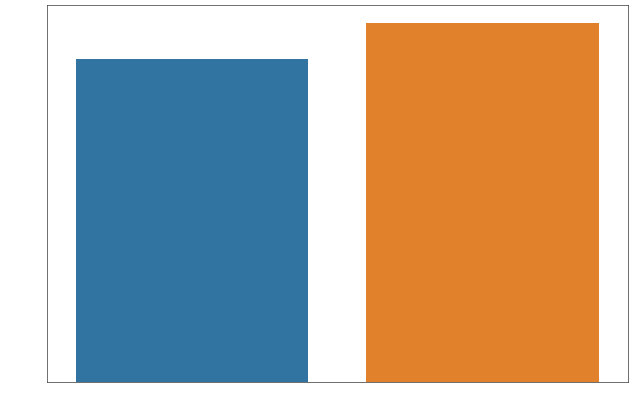

In [8]:
fig = plt.figure(figsize=(15, 10), dpi=50)
ax = fig.add_subplot()
ax.tick_params(colors = "white")
plt.xlabel('target',fontsize=18,color="white")
plt.ylabel('count',fontsize=18,color="white")
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
sns.countplot(x="target",data=data)

In [9]:
success = data["target"].sum() / len(data["target"])
print("成功割合:{}".format(success))

成功割合:0.5266955266955267


##### 目標金額

In [10]:
print("max:{} min:{}".format(data["目標金額"].max(),data["目標金額"].min()))

max:30000000 min:10000


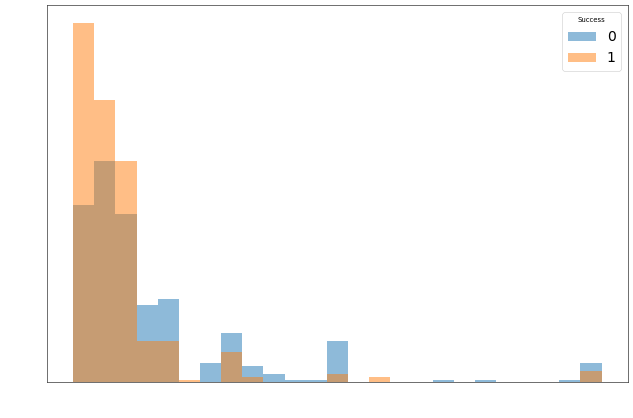

In [11]:
fig = plt.figure(figsize=(15, 10), dpi=50)
ax = fig.add_subplot()
ax.tick_params(colors = "white")
plt.hist(data.loc[data['target']==0,'目標金額'],range=(10000,10000000),bins=25,alpha=0.5,label='0')
plt.hist(data.loc[data['target']==1,'目標金額'],range=(10000,10000000),bins=25,alpha=0.5,label='1')
plt.xlabel('target_value',fontsize=18,color="white")
plt.ylabel('count',fontsize=18,color="white")
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.legend(title='Success',fontsize=20)

目標額200万以上だと失敗プロジェクトが優勢

In [12]:
#外れ値があるので平均は不適切かも
print("成功グループの平均:{}".format(data.loc[data['target']==1,'目標金額'].mean()))
print("失敗グループの平均:{}".format(data.loc[data['target']==0,'目標金額'].mean()))
print("成功グループの中央値:{}".format(data.loc[data['target']==1,'目標金額'].median()))
print("失敗グループの中央値:{}".format(data.loc[data['target']==0,'目標金額'].median()))

成功グループの平均:901689.4630136986
失敗グループの平均:1814899.8140243902
成功グループの中央値:500000.0
失敗グループの中央値:1000000.0


#### 支援者数

In [13]:
print("max:{} min:{}".format(data["支援者数"].max(),data["支援者数"].min()))

max:10002 min:0


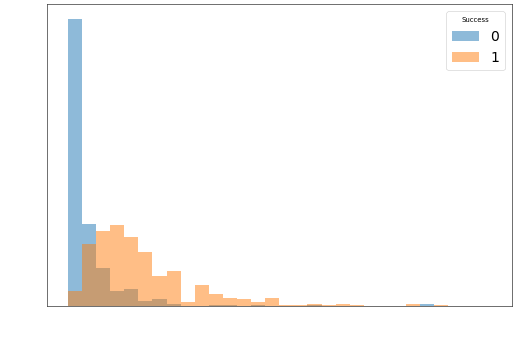

In [14]:
fig = plt.figure(figsize=(12, 8), dpi=50)
ax = fig.add_subplot()
ax.tick_params(colors = "white")
plt.hist(data.loc[data['target']==0,'支援者数'],range=(0,600),bins=30,alpha=0.5,label='0')
plt.hist(data.loc[data['target']==1,'支援者数'],range=(0,600),bins=30,alpha=0.5,label='1')
plt.xlabel('supporters',fontsize=18,color="white")
plt.ylabel('count',fontsize=18,color="white")
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.legend(title='Success',fontsize=20)

失敗プロジェクトは支援者数40以下が大多数である

In [15]:
#外れ値があるので平均は不適切かも
print("成功グループの平均:{}".format(data.loc[data['target']==1,'支援者数'].mean()))
print("失敗グループの平均:{}".format(data.loc[data['target']==0,'支援者数'].mean()))
print("成功グループの中央値:{}".format(data.loc[data['target']==1,'支援者数'].median()))
print("失敗グループの中央値:{}".format(data.loc[data['target']==0,'支援者数'].median()))

成功グループの平均:151.97260273972603
失敗グループの平均:32.56707317073171
成功グループの中央値:89.0
失敗グループの中央値:14.0


#### 画像数

In [16]:
print("max:{} min:{}".format(data["画像数"].max(),data["画像数"].min()))

max:67 min:0


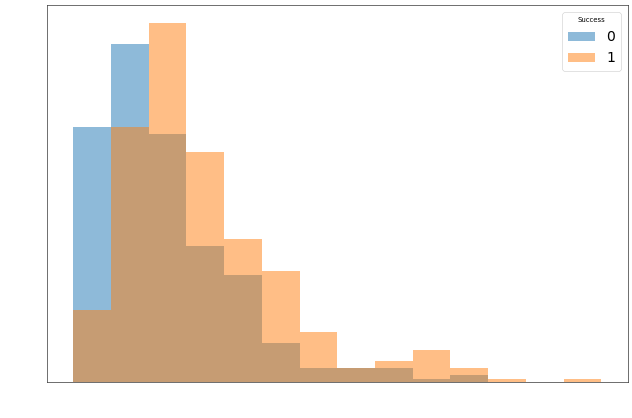

In [17]:
fig = plt.figure(figsize=(15, 10), dpi=50)
ax = fig.add_subplot()
ax.tick_params(colors = "white")
plt.hist(data.loc[data['target']==0,'画像数'],range=(0,70),bins=14,alpha=0.5,label='0')
plt.hist(data.loc[data['target']==1,'画像数'],range=(0,70),bins=14,alpha=0.5,label='1')
plt.xlabel('image',fontsize=18,color="white")
plt.ylabel('count',fontsize=18,color="white")
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.legend(title='Success',fontsize=20)

In [18]:
print("成功グループの平均:{}".format(data.loc[data['target']==1,'画像数'].mean()))
print("失敗グループの平均:{}".format(data.loc[data['target']==0,'画像数'].mean()))
print("成功グループの中央値:{}".format(data.loc[data['target']==1,'画像数'].median()))
print("失敗グループの中央値:{}".format(data.loc[data['target']==0,'画像数'].median()))

成功グループの平均:16.843835616438355
失敗グループの平均:11.332317073170731
成功グループの中央値:14.0
失敗グループの中央値:9.0


成功グループの方が画像数が多い傾向はあるが主要因ではなさそう

#### 動画数

In [19]:
print("max:{} min:{}".format(data["動画数"].max(),data["動画数"].min()))

max:6 min:0


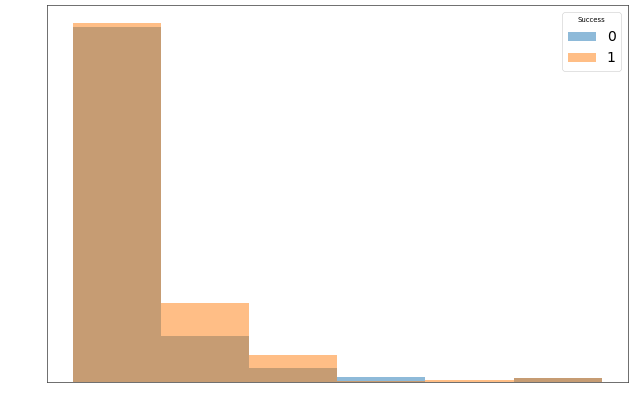

In [20]:
fig = plt.figure(figsize=(15, 10), dpi=50)
ax = fig.add_subplot()
ax.tick_params(colors = "white")
plt.hist(data.loc[data['target']==0,'動画数'],range=(0,6),bins=6,alpha=0.5,label='0')
plt.hist(data.loc[data['target']==1,'動画数'],range=(0,6),bins=6,alpha=0.5,label='1')
plt.xlabel('movie',fontsize=18,color="white")
plt.ylabel('count',fontsize=18,color="white")
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.legend(title='Success',fontsize=20)

In [21]:
print("成功グループの平均:{}".format(data.loc[data['target']==1,'動画数'].mean()))
print("失敗グループの平均:{}".format(data.loc[data['target']==0,'動画数'].mean()))
print("成功グループの中央値:{}".format(data.loc[data['target']==1,'動画数'].median()))
print("失敗グループの中央値:{}".format(data.loc[data['target']==0,'動画数'].median()))

成功グループの平均:0.3561643835616438
失敗グループの平均:0.2621951219512195
成功グループの中央値:0.0
失敗グループの中央値:0.0


In [22]:
print("動画ありグループの成功率:{}".format(data.loc[data['動画数']>=1,'target'].mean()))
print("動画なしグループの成功率:{}".format(data.loc[data['動画数']==0,'target'].mean()))

動画ありグループの成功率:0.6197183098591549
動画なしグループの成功率:0.5027223230490018


成否にはほとんど影響なさそう

#### 文字数

In [23]:
print("max:{} min:{}".format(data["文字数"].max(),data["文字数"].min()))

max:20054 min:378


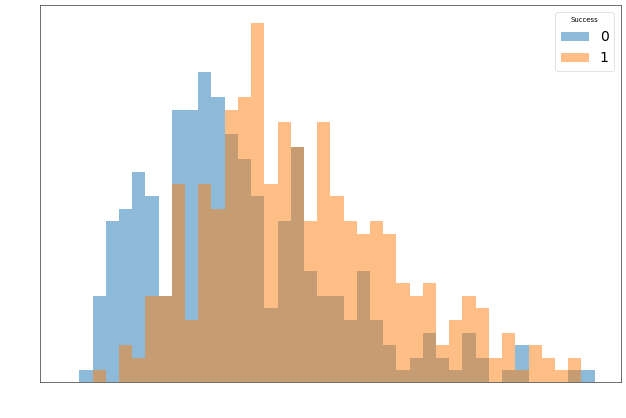

In [24]:
fig = plt.figure(figsize=(15, 10), dpi=50)
ax = fig.add_subplot()
ax.tick_params(colors = "white")
plt.hist(data.loc[data['target']==0,'文字数'],range=(0,8000),bins=40,alpha=0.5,label='0')
plt.hist(data.loc[data['target']==1,'文字数'],range=(0,8000),bins=40,alpha=0.5,label='1')
plt.xlabel('word',fontsize=18,color="white")
plt.ylabel('count',fontsize=18,color="white")
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.legend(title='Success',fontsize=20)

In [25]:
print("成功グループの平均:{}".format(data.loc[data['target']==1,'文字数'].mean()))
print("失敗グループの平均:{}".format(data.loc[data['target']==0,'文字数'].mean()))
print("成功グループの中央値:{}".format(data.loc[data['target']==1,'文字数'].median()))
print("失敗グループの中央値:{}".format(data.loc[data['target']==0,'文字数'].median()))

成功グループの平均:3726.972602739726
失敗グループの平均:2724.314024390244
成功グループの中央値:3403.0
失敗グループの中央値:2380.5


成功グループの方が文字数はやや多い

#### 活動報告回数

In [26]:
print("max:{} min:{}".format(data["活動報告回数"].max(),data["活動報告回数"].min()))

max:99 min:0


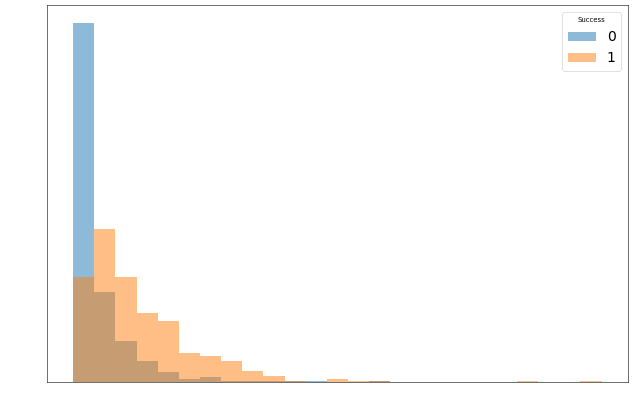

In [27]:
fig = plt.figure(figsize=(15, 10), dpi=50)
ax = fig.add_subplot()
ax.tick_params(colors = "white")
plt.hist(data.loc[data['target']==0,'活動報告回数'],range=(0,100),bins=25,alpha=0.5,label='0')
plt.hist(data.loc[data['target']==1,'活動報告回数'],range=(0,100),bins=25,alpha=0.5,label='1')
plt.xlabel('report',fontsize=18,color="white")
plt.ylabel('count',fontsize=18,color="white")
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.legend(title='Success',fontsize=20)

失敗プロジェクトは活動報告回数4以下が大多数

In [28]:
print("成功グループの平均:{}".format(data.loc[data['target']==1,'活動報告回数'].mean()))
print("失敗グループの平均:{}".format(data.loc[data['target']==0,'活動報告回数'].mean()))
print("成功グループの中央値:{}".format(data.loc[data['target']==1,'活動報告回数'].median()))
print("失敗グループの中央値:{}".format(data.loc[data['target']==0,'活動報告回数'].median()))

成功グループの平均:11.983561643835616
失敗グループの平均:3.923780487804878
成功グループの中央値:9.0
失敗グループの中央値:1.0


　成功グループと失敗グループで明確な差があり,成否に大きく影響しそう

#### リターン種類数

In [29]:
print("max:{} min:{}".format(data["リターン種類数"].max(),data["リターン種類数"].min()))

max:49 min:0


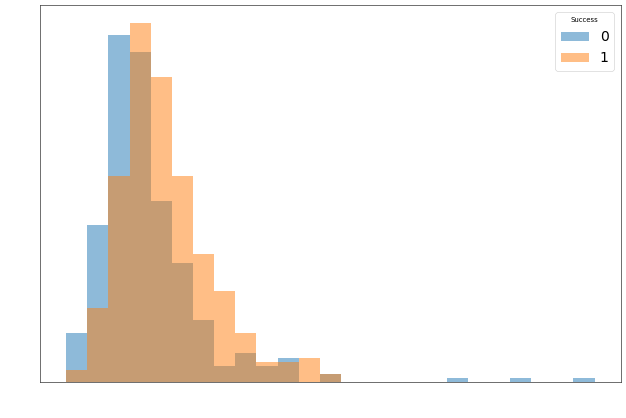

In [30]:
fig = plt.figure(figsize=(15, 10), dpi=50)
ax = fig.add_subplot()
ax.tick_params(colors = "white")
plt.hist(data.loc[data['target']==0,'リターン種類数'],range=(0,50),bins=25,alpha=0.5,label='0')
plt.hist(data.loc[data['target']==1,'リターン種類数'],range=(0,50),bins=25,alpha=0.5,label='1')
plt.xlabel('return',fontsize=18,color="white")
plt.ylabel('count',fontsize=18,color="white")
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.legend(title='Success',fontsize=20)

In [31]:
print("成功グループの平均:{}".format(data.loc[data['target']==1,'リターン種類数'].mean()))
print("失敗グループの平均:{}".format(data.loc[data['target']==0,'リターン種類数'].mean()))
print("成功グループの中央値:{}".format(data.loc[data['target']==1,'リターン種類数'].median()))
print("失敗グループの中央値:{}".format(data.loc[data['target']==0,'リターン種類数'].median()))

成功グループの平均:8.92054794520548
失敗グループの平均:7.323170731707317
成功グループの中央値:8.0
失敗グループの中央値:6.0


成否にはほとんど影響なさそう

#### 支援額上限

In [32]:
print("max:{} min:{}".format(data["支援額上限"].max(),data["支援額上限"].min()))

max:2900000 min:1200


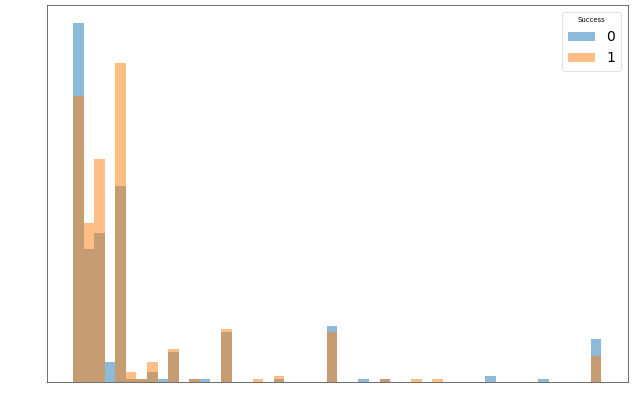

In [33]:
fig = plt.figure(figsize=(15, 10), dpi=50)
ax = fig.add_subplot()
ax.tick_params(colors = "white")
plt.hist(data.loc[data['target']==0,'支援額上限'],range=(1000,1000000),bins=50,alpha=0.5,label='0')
plt.hist(data.loc[data['target']==1,'支援額上限'],range=(1000,1000000),bins=50,alpha=0.5,label='1')
plt.xlabel('upper_value',fontsize=18,color="white")
plt.ylabel('count',fontsize=18,color="white")
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.legend(title='Success',fontsize=20)

In [34]:
print("成功グループの平均:{}".format(data.loc[data['target']==1,'支援額上限'].mean()))
print("失敗グループの平均:{}".format(data.loc[data['target']==0,'支援額上限'].mean()))
print("成功グループの中央値:{}".format(data.loc[data['target']==1,'支援額上限'].median()))
print("失敗グループの中央値:{}".format(data.loc[data['target']==0,'支援額上限'].median()))

成功グループの平均:129201.11780821918
失敗グループの平均:147056.92682926828
成功グループの中央値:50000.0
失敗グループの中央値:50000.0


成否にはほとんど影響なさそう

#### 支援額下限

In [35]:
print("max:{} min:{}".format(data["支援額下限"].max(),data["支援額下限"].min()))

max:26000 min:500


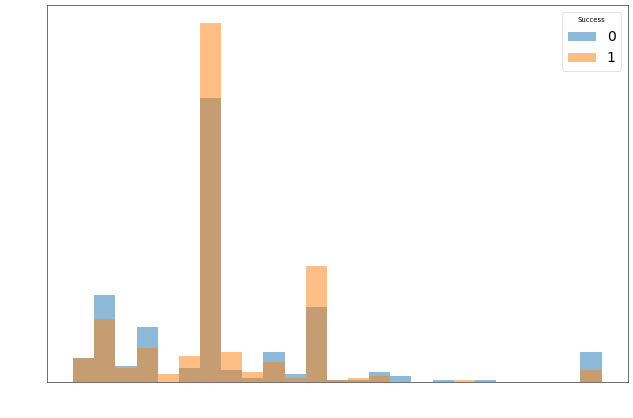

In [36]:
fig = plt.figure(figsize=(15, 10), dpi=50)
ax = fig.add_subplot()
ax.tick_params(colors = "white")
plt.hist(data.loc[data['target']==0,'支援額下限'],range=(500,10000),bins=25,alpha=0.5,label='0')
plt.hist(data.loc[data['target']==1,'支援額下限'],range=(500,10000),bins=25,alpha=0.5,label='1')
plt.xlabel('bottom_value',fontsize=18,color="white")
plt.ylabel('count',fontsize=18,color="white")
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.legend(title='Success',fontsize=20)

In [37]:
print("成功グループの平均:{}".format(data.loc[data['target']==1,'支援額下限'].mean()))
print("失敗グループの平均:{}".format(data.loc[data['target']==0,'支援額下限'].mean()))
print("成功グループの中央値:{}".format(data.loc[data['target']==1,'支援額下限'].median()))
print("失敗グループの中央値:{}".format(data.loc[data['target']==0,'支援額下限'].median()))

成功グループの平均:3310.145205479452
失敗グループの平均:3310.231707317073
成功グループの中央値:3000.0
失敗グループの中央値:3000.0


成否にはほとんど影響なさそう

#### 最高支援額

In [38]:
print("max:{} min:{}".format(data["最高支援額"].max(),data["最低支援額"].min()))

max:1200000 min:0


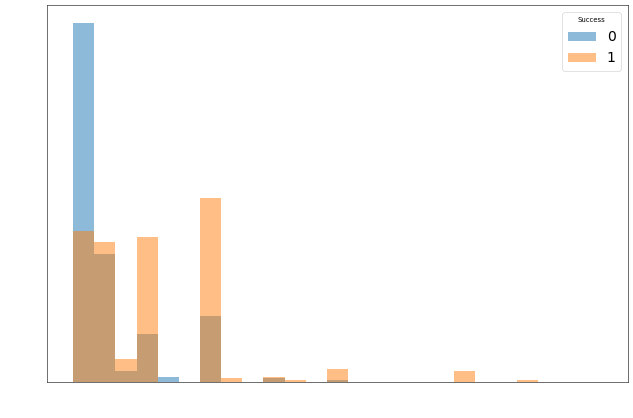

In [39]:
fig = plt.figure(figsize=(15, 10), dpi=50)
ax = fig.add_subplot()
ax.tick_params(colors = "white")
plt.hist(data.loc[data['target']==0,'最高支援額'],range=(0,400000),bins=25,alpha=0.5,label='0')
plt.hist(data.loc[data['target']==1,'最高支援額'],range=(0,400000),bins=25,alpha=0.5,label='1')
plt.xlabel('max_value',fontsize=18,color="white")
plt.ylabel('count',fontsize=18,color="white")
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.legend(title='Success',fontsize=20)

In [40]:
print("成功グループの平均:{}".format(data.loc[data['target']==1,'最高支援額'].mean()))
print("失敗グループの平均:{}".format(data.loc[data['target']==0,'最高支援額'].mean()))
print("成功グループの中央値:{}".format(data.loc[data['target']==1,'最高支援額'].median()))
print("失敗グループの中央値:{}".format(data.loc[data['target']==0,'最高支援額'].median()))

成功グループの平均:79039.30958904109
失敗グループの平均:38090.40243902439
成功グループの中央値:50000.0
失敗グループの中央値:12000.0


#### 最低支援額

In [41]:
print("max:{} min:{}".format(data["最低支援額"].max(),data["最低支援額"].min()))

max:50000 min:0


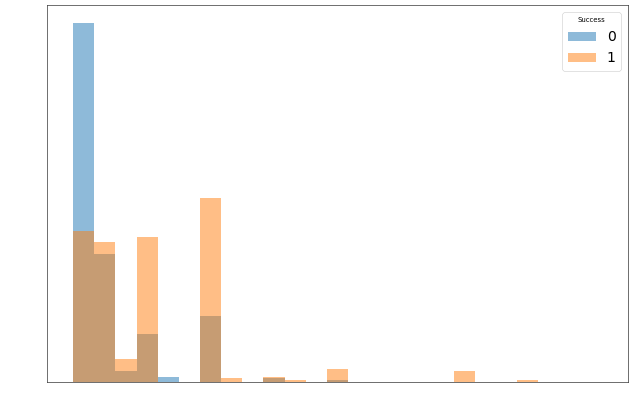

In [42]:
fig = plt.figure(figsize=(15, 10), dpi=50)
ax = fig.add_subplot()
ax.tick_params(colors = "white")
plt.hist(data.loc[data['target']==0,'最高支援額'],range=(0,400000),bins=25,alpha=0.5,label='0')
plt.hist(data.loc[data['target']==1,'最高支援額'],range=(0,400000),bins=25,alpha=0.5,label='1')
plt.xlabel('min_value',fontsize=18,color="white")
plt.ylabel('count',fontsize=18,color="white")
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.legend(title='Success',fontsize=20)

In [43]:
print("成功グループの平均:{}".format(data.loc[data['target']==1,'最低支援額'].mean()))
print("失敗グループの平均:{}".format(data.loc[data['target']==0,'最低支援額'].mean()))
print("成功グループの中央値:{}".format(data.loc[data['target']==1,'最低支援額'].median()))
print("失敗グループの中央値:{}".format(data.loc[data['target']==0,'最低支援額'].median()))

成功グループの平均:3430.6931506849314
失敗グループの平均:3733.7103658536585
成功グループの中央値:3000.0
失敗グループの中央値:3000.0


#### 一人当たり支援額

In [44]:
print("max:{} min:{}".format(data["一人当たり支援額"].max(),data["一人当たり支援額"].min()))

max:69895.0 min:0.0


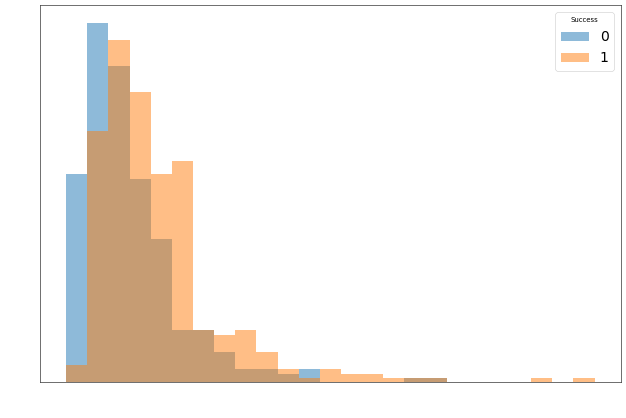

In [45]:
fig = plt.figure(figsize=(15, 10), dpi=50)
ax = fig.add_subplot()
ax.tick_params(colors = "white")
plt.hist(data.loc[data['target']==0,'一人当たり支援額'],range=(0,70000),bins=25,alpha=0.5,label='0')
plt.hist(data.loc[data['target']==1,'一人当たり支援額'],range=(0,70000),bins=25,alpha=0.5,label='1')
plt.xlabel('value_per_head',fontsize=18,color="white")
plt.ylabel('count',fontsize=18,color="white")
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.legend(title='Success',fontsize=20)

In [46]:
print("成功グループの平均:{}".format(data.loc[data['target']==1,'一人当たり支援額'].mean()))
print("失敗グループの平均:{}".format(data.loc[data['target']==0,'一人当たり支援額'].mean()))
print("成功グループの中央値:{}".format(data.loc[data['target']==1,'一人当たり支援額'].median()))
print("失敗グループの中央値:{}".format(data.loc[data['target']==0,'一人当たり支援額'].median()))

成功グループの平均:12077.739726027397
失敗グループの平均:8283.128048780487
成功グループの中央値:9979.0
失敗グループの中央値:6691.0


成功グループでは失敗グループに比べて,平均的に約1.5倍高い結果になった

#### 返礼品ありの下限

In [47]:
print("max:{} min:{}".format(data["返礼品ありの下限"].max(),data["返礼品ありの下限"].min()))

max:50000 min:0


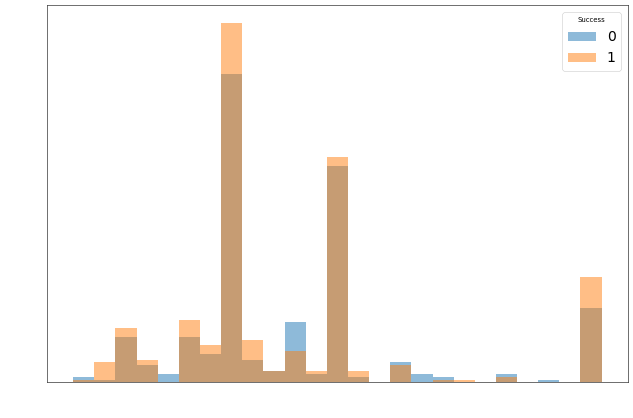

In [48]:
fig = plt.figure(figsize=(15, 10), dpi=50)
ax = fig.add_subplot()
ax.tick_params(colors = "white")
plt.hist(data.loc[data['target']==0,'返礼品ありの下限'],range=(0,10000),bins=25,alpha=0.5,label='0')
plt.hist(data.loc[data['target']==1,'返礼品ありの下限'],range=(0,10000),bins=25,alpha=0.5,label='1')
plt.xlabel('word',fontsize=18,color="white")
plt.ylabel('count',fontsize=18,color="white")
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.legend(title='Success',fontsize=20)

In [49]:
print("成功グループの平均:{}".format(data.loc[data['target']==1,'返礼品ありの下限'].mean()))
print("失敗グループの平均:{}".format(data.loc[data['target']==0,'返礼品ありの下限'].mean()))
print("成功グループの中央値:{}".format(data.loc[data['target']==1,'返礼品ありの下限'].median()))
print("失敗グループの中央値:{}".format(data.loc[data['target']==0,'返礼品ありの下限'].median()))

成功グループの平均:4265.734246575343
失敗グループの平均:4789.198170731707
成功グループの中央値:3000.0
失敗グループの中央値:3200.0


成否にほとんど影響なさそう

#### 最高額支援ダミー

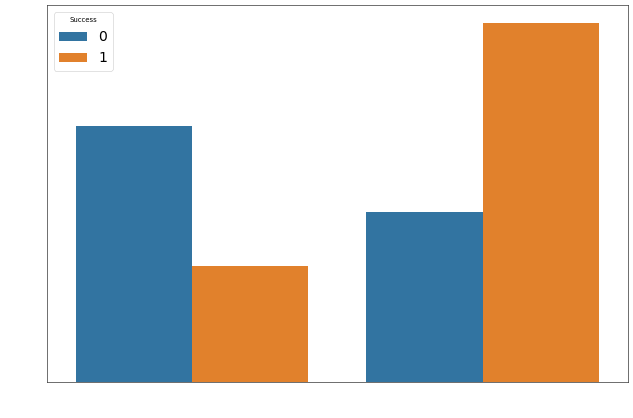

In [50]:
fig = plt.figure(figsize=(15, 10), dpi=50)
ax = fig.add_subplot()
sns.countplot(x='最高額支援ダミー',hue='target',data=data)
ax.tick_params(colors = "white")
plt.xlabel('dummy',fontsize=18,color="white")
plt.ylabel('count',fontsize=18,color="white")
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.legend(title='Success',fontsize=20)

In [51]:
dummy = data["最高額支援ダミー"].sum() / len(data["最高額支援ダミー"])
print("ダミー変数が1になる割合:{}".format(dummy))

ダミー変数が1になる割合:0.5873015873015873


In [52]:
print("成功グループの割合:{}".format(data.loc[data['target']==1,'最高額支援ダミー'].sum() / len(data.loc[data['target']==1])))
print("失敗グループの割合:{}".format(data.loc[data['target']==0,'最高額支援ダミー'].sum() / len(data.loc[data['target']==0])))

成功グループの割合:0.7561643835616438
失敗グループの割合:0.39939024390243905


#### 最低額返礼品ダミー

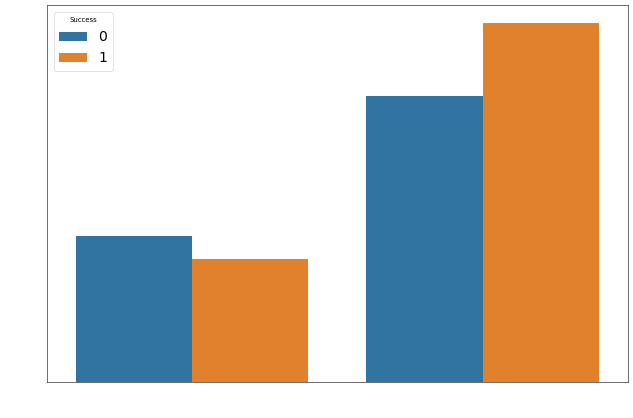

In [53]:
fig = plt.figure(figsize=(15, 10), dpi=50)
ax = fig.add_subplot()
sns.countplot(x='最低額返礼品ダミー',hue='target',data=data)
ax.tick_params(colors = "white")
plt.xlabel('dummy',fontsize=18,color="white")
plt.ylabel('count',fontsize=18,color="white")
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.legend(title='Success',fontsize=20)

In [54]:
dummy = data["最低額返礼品ダミー"].sum() / len(data["最低額返礼品ダミー"])
print("ダミー変数が1になる割合:{}".format(dummy))

ダミー変数が1になる割合:0.7056277056277056


In [55]:
print("成功グループの割合:{}".format(data.loc[data['target']==1,'最低額返礼品ダミー'].sum() / len(data.loc[data['target']==1])))
print("失敗グループの割合:{}".format(data.loc[data['target']==0,'最低額返礼品ダミー'].sum() / len(data.loc[data['target']==0])))

成功グループの割合:0.7452054794520548
失敗グループの割合:0.6615853658536586


成功グループ,失敗グループ問わず70%前後のプロジェクトでは,最低額のコースに返礼品が付与

#### 自然災害ダミー

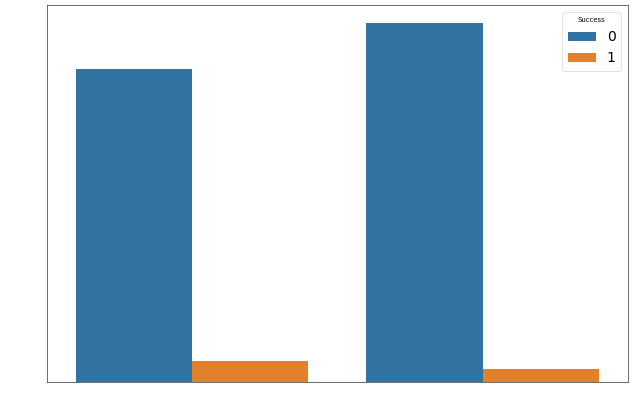

In [56]:
fig = plt.figure(figsize=(15, 10), dpi=50)
ax = fig.add_subplot()
sns.countplot(x='target',hue='自然災害ダミー',data=data)
ax.tick_params(colors = "white")
plt.xlabel('dummy',fontsize=18,color="white")
plt.ylabel('count',fontsize=18,color="white")
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.legend(title='Success',fontsize=20)

In [57]:
dummy = data["自然災害ダミー"].sum() / len(data["自然災害ダミー"])
print("ダミー変数が1になる割合:{}".format(dummy))

ダミー変数が1になる割合:0.049062049062049064


In [58]:
print("災害グループの成功率:{}".format(data.loc[data['自然災害ダミー']==1,'target'].mean()))
print("非災害グループの成功率:{}".format(data.loc[data['自然災害ダミー']==0,'target'].mean()))

災害グループの成功率:0.38235294117647056
非災害グループの成功率:0.5341426403641881


#### 畜産ダミー

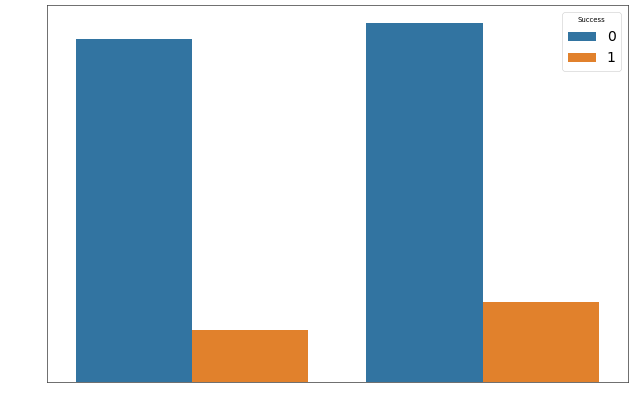

In [59]:
fig = plt.figure(figsize=(15, 10), dpi=50)
ax = fig.add_subplot()
sns.countplot(x='target',hue='畜産ダミー',data=data)
ax.tick_params(colors = "white")
plt.xlabel('dummy',fontsize=18,color="white")
plt.ylabel('count',fontsize=18,color="white")
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.legend(title='Success',fontsize=20)

In [60]:
dummy = data["畜産ダミー"].sum() / len(data["畜産ダミー"])
print("ダミー変数が1になる割合:{}".format(dummy))

ダミー変数が1になる割合:0.15873015873015872


In [61]:
print("畜産グループの成功率:{}".format(data.loc[data['畜産ダミー']==1,'target'].mean()))
print("耕種グループの成功率:{}".format(data.loc[data['畜産ダミー']==0,'target'].mean()))

畜産グループの成功率:0.6090909090909091
耕種グループの成功率:0.5111492281303602


In [62]:
data

,支援総額,目標金額,支援者数,画像数,動画数,文字数,活動報告回数,リターン種類数,最高支援額,支援額上限,支援額下限,最低支援額,返礼品ありの下限,一人当たり支援額,最高額支援ダミー,最低額返礼品ダミー,自然災害ダミー,畜産ダミー,target
0,1185000,1000000,71,8,0,2566,3,9,50000,50000,5000,5000,5000,16458.0,1,1,0,1,1
1,1382000,1000000,72,22,0,4010,5,12,100000,100000,3000,3000,3000,18932.0,1,1,0,1,1
2,1205000,1000000,91,9,1,4244,27,12,100000,100000,5000,5000,5000,13098.0,1,1,0,1,1
3,865000,600000,79,10,0,3500,13,5,10000,15000,5000,5000,10000,10812.0,0,0,0,1,1
4,1619000,1000000,116,18,0,3457,17,6,100000,300000,3000,3000,10000,13838.0,0,0,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
688,40000,150000,11,14,0,1156,3,5,5000,15000,1000,1000,1000,3333.0,0,1,0,0,0
689,679000,300000,59,21,0,4608,3,9,120000,120000,500,500,500,11317.0,1,1,0,0,1
690,18000,500000,3,21,0,1320,0,5,6000,48000,6000,6000,6000,4500.0,0,1,0,0,0
691,496800,1080000,40,10,0,1870,5,7,108000,108000,5400,5400,5400,12117.0,1,1,0,0,0
